
 # Ford GoBike Exploration
## by Sushil Pathak

## Investigation Overview
In this analysis, I will go into more depth about the rides that are getting affected based on the user type. Also, we will be looking at user types  and age groups and times it has been used. 
## Dataset Overview
> The data set include 183412 rows and 16 columns.Structure of dataset 
looks like this 
<ul>

<li>duration_sec                int   </li>
<li>start_time                 object </li>
<li>end_time                   object </li>
<li>start_station_id           float64</li>
<li>start_station_name         object </li>
<li>start_station_latitude     float64</li>
<li>start_station_longitude    float64</li>
<li>end_station_id             float64</li>
<li>end_station_name           object </li>
<li>end_station_latitude       float64</li>
<li>end_station_longitude      float64</li>
<li>bike_id                    int64  </li>
<li>user_type                  object </li>
<li>member_birth_year          float64 </li>
<li>member_gender              object </li>
  </ul>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as tick


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('df_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018386 entries, 0 to 1018385
Data columns (total 21 columns):
duration_sec               1018386 non-null int64
start_time                 1018386 non-null object
end_time                   1018386 non-null object
start_station_id           1013141 non-null float64
start_station_name         1013141 non-null object
start_station_latitude     1018386 non-null float64
start_station_longitude    1018386 non-null float64
end_station_id             1013141 non-null float64
end_station_name           1013141 non-null object
end_station_latitude       1018386 non-null float64
end_station_longitude      1018386 non-null float64
bike_id                    1018386 non-null int64
user_type                  1018386 non-null object
member_birth_year          947260 non-null float64
member_gender              947522 non-null object
bike_share_for_all_trip    1018386 non-null object
age                        947260 non-null float64
duration_minutes 

## Distribution of Trip Duration
In this visualization, we will be looking at the distribution of the trip. 


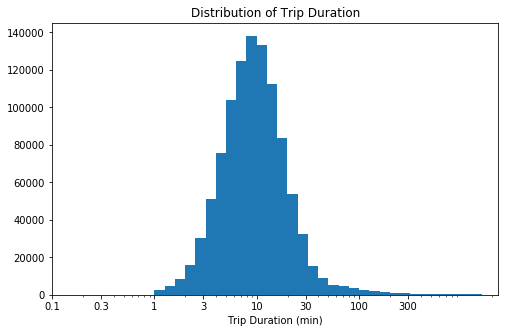

In [4]:

bins = 10 ** np.arange(0, np.log10(df['duration_minutes'].max())+0.1, 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_minutes', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (min)')
plt.title('Distribution of Trip Duration')
plt.show();

Looking at the distribution from the plot we can see that it is unimodal distribution with an peak at 10 minutes. 

## Trip duration based on user type 
> Suscriber tends to drive lesser than customer.Suscriber might be using it for regaular use like for work, school. While customer might be tourist or a person who owns car. 

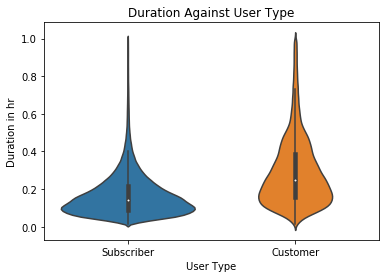

In [5]:
df_duration=df.query("duration_hr < 1")
sb.violinplot(data=df_duration,x='user_type',y='duration_hr')
plt.xlabel('User Type')
plt.ylabel('Duration in hr')
plt.title('Duration Against User Type');

## Trip duration based on gender and age. 
>Looking at it we can see that the distrubiton of the age and the duration of ride based on the gender. Based on the distribution, we can see that Female are using more rides than male in overall. 


In [6]:
df_duration['age_category']=df_duration['age'].apply(lambda x:'0-20' if 0<x<=20
                                         else'20-40' if 20<x<=40
                                         else '40-60' if 40<x<=60
                                         else '60-80' if 60<x<80
                                         else 'Other Age')

In [7]:
df_duration.dropna()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_minutes,duration_hr,month,day,age_category
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,...,Subscriber,1988.0,Male,No,33.0,7.550000,0.125833,1,31,20-40
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,Subscriber,1980.0,Male,No,41.0,3.000000,0.050000,1,31,40-60
8,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,...,Subscriber,1987.0,Male,Yes,34.0,16.600000,0.276667,1,31,20-40
9,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,...,Subscriber,1994.0,Female,Yes,27.0,13.750000,0.229167,1,31,20-40
11,432,2018-01-31 23:34:26.484,2018-01-31 23:41:39.297,89.0,Division St at Potrero Ave,37.769218,-122.407646,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Subscriber,1993.0,Male,No,28.0,7.200000,0.120000,1,31,20-40
12,601,2018-01-31 23:29:46.832,2018-01-31 23:39:48.000,223.0,16th St Mission BART Station 2,37.764765,-122.420091,86.0,Market St at Dolores St,37.769305,...,Subscriber,1957.0,Male,No,64.0,10.016667,0.166944,1,31,60-80
13,887,2018-01-31 23:24:16.357,2018-01-31 23:39:04.123,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,...,Subscriber,1976.0,Female,Yes,45.0,14.783333,0.246389,1,31,40-60
14,210,2018-01-31 23:33:03.046,2018-01-31 23:36:33.704,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,186.0,Lakeside Dr at 14th St,37.801319,...,Subscriber,1976.0,Male,No,45.0,3.500000,0.058333,1,31,40-60
15,188,2018-01-31 23:30:58.136,2018-01-31 23:34:06.391,98.0,Valencia St at 16th St,37.765052,-122.421866,76.0,McCoppin St at Valencia St,37.771662,...,Subscriber,1964.0,Female,No,57.0,3.133333,0.052222,1,31,40-60
16,808,2018-01-31 23:19:58.603,2018-01-31 23:33:27.531,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,98.0,Valencia St at 16th St,37.765052,...,Subscriber,1976.0,Male,Yes,45.0,13.466667,0.224444,1,31,40-60


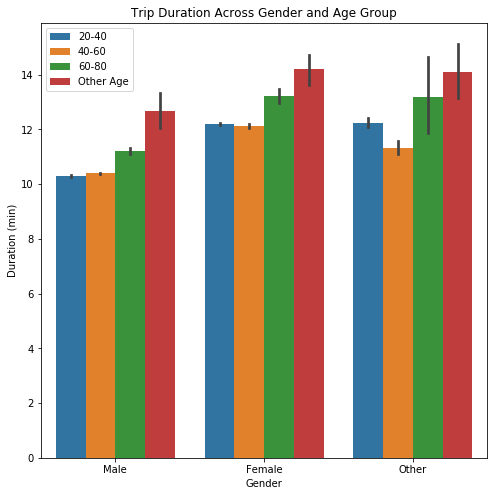

In [8]:
plt.figure(figsize = [8, 8])

ax = sb.barplot(x='member_gender', y = 'duration_minutes', hue='age_category', data=df_duration.sort_values(by= 'age_category'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
leg = ax.legend()

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt 
